In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/home/apprenant/FoodFlix_data/Data/en.openfoodfacts.org.products.tsv",sep='\t')
pd.set_option('max_columns', None)

/home/apprenant/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Columns selection

In [39]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
129462,702014072133,http://world-en.openfoodfacts.org/product/0702...,usda-ndb-import,1489095211,2017-03-09T21:33:31Z,1489095211,2017-03-09T21:33:31Z,Art For The Table Chili Vinegar,NaN,NaN,NaN,NaN,Msrf,msrf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,Spirit vinegar (reduced with water to 6% acidi...,NaN,NaN,NaN,NaN,NaN,30 ml (30 ml),NaN,4.0,[ spirit-vinegar -> en:spirit-vinegar ] [ v...,"en:e202,en:e211,en:e221,en:e330","E202 - Potassium sorbate,E211 - Sodium benzoat...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,138.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,1.27000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN
212182,3245413734020,http://world-en.openfoodfacts.org/product/3245...,jerome,1340053283,2012-06-18T21:01:23Z,1455470918,2016-02-14T17:28:38Z,Crème anglaise

In [40]:
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

On sélectionne les colonnes qui apporte des informations sur :  
- les caractéristiques du produit (nom, marque, pays, ...)  
- les éléments composant le produit (allergène, nutriments, KJ, ...)

In [41]:
key_cols = [
            'product_name', 
            'brands', 
            'countries_en',
            'allergens',
            'traces',
            'additives_n',
            'additives_en',
            'ingredients_from_palm_oil_n',
            'nutrition_grade_fr',
            'pnns_groups_1',
            'pnns_groups_2',
            'energy_100g',
            'fat_100g',
            'saturated-fat_100g',
            'polyunsaturated-fat_100g',
            'trans-fat_100g',
            'cholesterol_100g',
            'carbohydrates_100g',
            'sugars_100g',
            '-lactose_100g',
            'fiber_100g',
            'proteins_100g',
            'salt_100g',
            'sodium_100g',
            'alcohol_100g',
            'fruits-vegetables-nuts_100g',
            'fruits-vegetables-nuts-estimate_100g',
            'nutrition-score-fr_100g',
           ]

df = df[key_cols]

In [42]:
# rename all columns
names_cols = {'countries_en': 'countries',
              'additives_n' : 'nb_additives',
              'additives_en' : 'additives_name',
              'ingredients_from_palm_oil_n' : 'nb_ingredients_from_palm_oil',
              '-lactose_100g' : 'lactose_100g',
              'nutrition_grade_fr': 'nutrition_grade',
              'nutrition-score-fr_100g' : 'nutrition_score'
             }

df = df.rename(names_cols, axis=1)

In [43]:
df.sample(5)

,product_name,brands,countries,allergens,traces,nb_additives,additives_name,nb_ingredients_from_palm_oil,nutrition_grade,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,lactose_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,nutrition_score
278259,Parmentier de boeuf aux topinambours,Good Goût,France,lait,NaN,0.0,NaN,0.0,a,Fish Meat Eggs,Meat,251.0,1.4,0.7,NaN,NaN,NaN,7.6,5.6,NaN,1.5,3.5,0.03,0.011811,NaN,NaN,NaN,-3.0
258059,Jambon serrano Espagnol,Carrefour,France,NaN,NaN,3.0,"E250 - Sodium nitrite,E252 - Potassium nitrate...",0.0,d,Fish Meat Eggs,Processed meat,903.0,10.0,3.9,NaN,NaN,NaN,1.0,1.0,NaN,NaN,30.0,5.90,2.322835,0.0,NaN,NaN,15.0
302954,Creme Riche Et Onctueuse,Delhaize,France,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,703.0,NaN,20.6,NaN,NaN,NaN,NaN,3.1,NaN,0.0,2.2,0.09,0.035433,NaN,NaN,NaN,12.0
264156,Spécialité de Fruits Multifruits,"Rik & Rok,Auchan",France,NaN,NaN,3.0,"E101 - Riboflavin,E101i - Riboflavin,E300 - As...",0.0,a,Fruits and vegetables,Fruits,258.0,0.1,0.0,NaN,NaN,NaN,13.8,12.3,NaN,1.0,0.3,0.01,0.003937,NaN,NaN,NaN,-4.0
275701,Le vrai fondant,Michel et Augustin,France,NaN,NaN,1.0,"E322 - Lecithins,E322i - Lecithin",0.0,e,Sugary snacks,Biscuits and cakes,1904.0,26.0,17.0,NaN,NaN,NaN,49.0,37.0,NaN,2.9,5.7,0.06,0.023622,NaN,NaN,NaN,19.0


In [44]:
df.shape

(356027, 28)

## Row selection

### 1. Country is France

In [45]:
# keep only rows with France value as country
df['countries'] = df['countries'].astype(str)
df = df.drop(df.countries.loc[~df.countries.str.contains("France")].index)
df['countries'] = 'France' # On assigne la valeur France par défaut à l'ensemble de la colonne country

### 2. Unknow product name

In [46]:
# remove all rows with an unknow product name
df.dropna(subset = ['product_name'], inplace = True)

### 3. Drop duplicates values

In [47]:
# keep the value with the most informations when duplicate exist
df['information_count'] = df.count(1) # count number of non empty values in each rows
df = df.sort_values('information_count',ascending=True).drop_duplicates(keep='last')

In [48]:
df.drop('information_count', inplace=True, axis=1)

## Complete NaN values

### Correlation between values

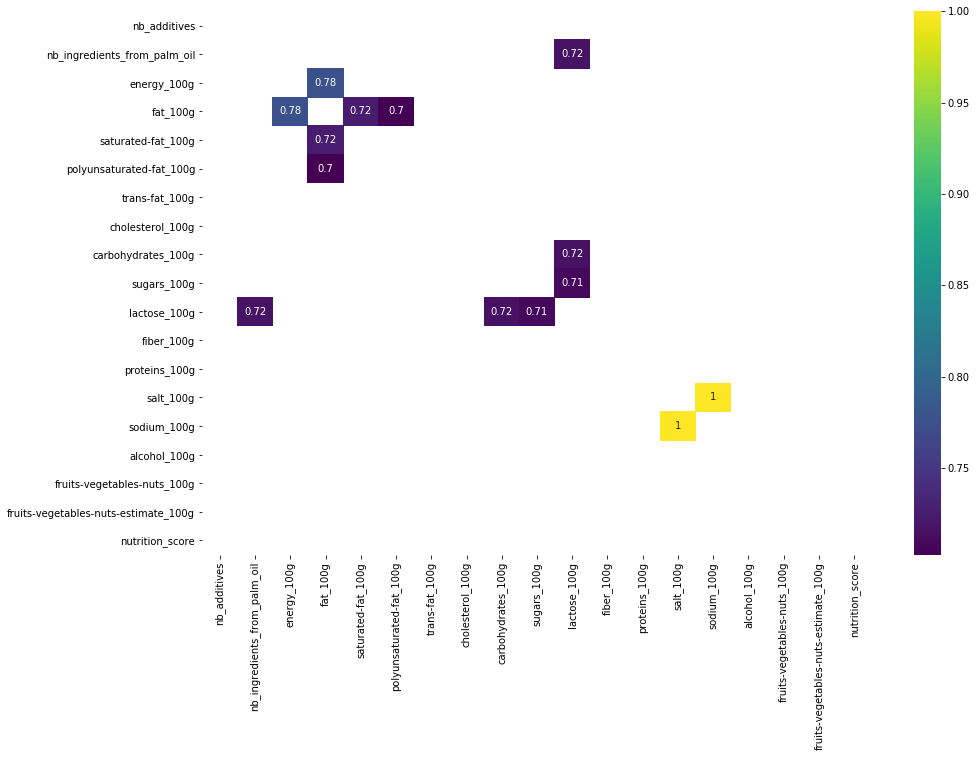

In [49]:
# show pairs with high correlation level
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.7)) & (dfCorr !=1.000)]
plt.figure(figsize=(15,10))
sns.heatmap(filteredDf, annot=True, cmap="viridis")
plt.show()

### 1. salt / sodium ratio

In [50]:
df['sel_sodium_ratio'] = df.salt_100g/df.sodium_100g
df['sel_sodium_ratio'].value_counts()

2.540000    17094
2.540000    11403
2.540000    11179
2.540000     5878
2.540000     5040
2.540000     4494
2.540000     4412
2.540000     3167
2.540000     2599
2.540000     2523
2.540000     1909
2.540000     1718
2.540000     1421
2.540000     1121
2.540000      964
2.540000      825
2.540000      821
2.540000      716
2.540000      643
2.540000      634
2.540000      582
2.540000      500
2.540000      492
2.540000      455
2.540000      336
2.540000      293
2.540000      237
2.540000      234
2.540000      220
2.540000      219
            ...  
2.550832        1
2.534483        1
2.540146        1
2.528736        1
2.537517        1
2.536657        1
2.539130        1
2.533784        1
2.537068        1
2.542936        1
2.541538        1
2.540250        1
2.543307        1
2.524272        1
2.532164        1
2.533898        1
2.536313        1
2.535565        1
2.543641        1
2.536082        1
2.537367        1
2.537445        1
2.536723        1
2.532189        1
2.539913  

D'après l'ensemble des valeurs, on retrouve un ratio de 2.54 entre le sel et le sodium. On peut donc se servir de cette information pour remplir l'ensemble des lignes avec une valeurs NaN pour l'un mais renseignée pour l'autre.

In [51]:
df['salt_100g'] = df.apply(lambda x: (x.sodium_100g / 2.54) if np.isnan(x.salt_100g) else x.salt_100g, axis='columns')
df['sodium_100g'] = df.apply(lambda x: (x.salt_100g * 2.54) if np.isnan(x.sodium_100g) else x.sodium_100g, axis='columns') # 
df[['salt_100g', 'sodium_100g']] = df[['salt_100g', 'sodium_100g']].fillna(0)
df.drop('sel_sodium_ratio', inplace=True, axis=1)

### 2. Fruits-vegetables-nuts_100g / fruits-vegetables-nuts-estimate_100g

In [52]:
df['fruits-vegetables-nuts_100g'] = df.apply(lambda x: x['fruits-vegetables-nuts-estimate_100g'] if np.isnan(x['fruits-vegetables-nuts_100g']) else x['fruits-vegetables-nuts_100g'], axis='columns')
df['fruits-vegetables-nuts-estimate_100g'] = df.apply(lambda x: x['fruits-vegetables-nuts_100g'] if np.isnan(x['fruits-vegetables-nuts-estimate_100g']) else x['fruits-vegetables-nuts-estimate_100g'], axis='columns') # 
df[['fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g']] = df[['fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g']].fillna(0)
df.drop('fruits-vegetables-nuts-estimate_100g', inplace=True, axis=1)

### 3. Replace NaN by 'No'

In [53]:
df[['allergens', 'traces', 'additives_name']] = df[['allergens', 'traces', 'additives_name']].fillna('No')

### 4.Replace NaN by 'unknow'

In [54]:
df[['pnns_groups_1', 'pnns_groups_2']] = df[['pnns_groups_1', 'pnns_groups_2']].fillna('unknown')

### 4. Replace NaN by 0

In [55]:
df[['nb_additives', 'nb_ingredients_from_palm_oil', 'alcohol_100g']] = df[['nb_additives', 'nb_ingredients_from_palm_oil', 'alcohol_100g']].fillna(0)

### 5. Add pnns group1 label when pnns group 2 label is know

In [56]:
df.groupby(['pnns_groups_1', 'pnns_groups_2']).sum()

nb_additives  \
pnns_groups_1           pnns_groups_2                                    
Beverages               Artificially sweetened beverages        1780.0   
                        Fruit juices                             376.0   
                        Fruit nectars                            378.0   
                        Non-sugared beverages                   2849.0   
                        Sweetened beverages                     5220.0   
Cereals and potatoes    Bread                                   2091.0   
                        Breakfast cereals                       2078.0   
                        Cereals                                 1491.0   
                        Legumes                                  235.0   
                        Potatoes                                  60.0   
Composite foods         One-dish meals                         12618.0   
                        Pizza pies and quiche                   1678.0   
                        Sandwich                                4919.0   
Fat and sauces          Dressings and sauces                    5093.0   
                        Fats                                    1297.0   
Fish Meat Eggs          Eggs                                       0.0   
                        Fish and seafood                        2132.0   
                        Meat                                    2444.0   
                        Processed meat                          8684.0   
Fruits and vegetables   Dried fruits                             240.0   
                        Fruits                                  1341.0   
                        Soups                                    267.0   
                        Vegetables                               694.0   
Milk and dairy products Cheese                                  2148.0   
                        Dairy desserts                          2618.0   
                        Ice cream                               3605.0   
                        Milk and yogurt                         3976.0   
Salty snacks            Appetizers                              3255.0   
                        Nuts                                     197.0   
                        Salty and fatty products                  12.0   
Sugary snacks           Biscuits and cakes                     15410.0   
                        Chocolate products                      3321.0   
                        Sweets                                 10262.0   
cereals-and-potatoes    cereals                                    0.0   
fruits-and-vegetables   fruits                                     0.0   
                        vegetables                               292.0   
sugary-snacks           pastries                                1817.0   
unknown                 Alcoholic beverages                      404.0   
                        Tripe dishes                              43.0   
                        unknown                                41413.0   

                                                          nb_ingredients_from_palm_oil  \
pnns_groups_1           pnns_groups_2                                                    
Beverages               Artificially sweetened beverages                           1.0   
                        Fruit juices                                               0.0   
                        Fruit nectars                                              0.0   
                        Non-sugared beverages                                     10.0   
                        Sweetened beverages                                       12.0   
Cereals and potatoes    Bread                                                    164.0   
                        Breakfast cereals                                        249.0   
                        Cereals                                                   87.0   
                        Legumes                  

In [57]:
def pnns (x):
    if 'Alcoholic beverages' in x.pnns_groups_2:
        return 'Beverages'
    elif 'Tripe dishes' in x.pnns_groups_2:
        return 'Fish Meat Eggs'
    else:
        return x.pnns_groups_1

df['pnns_groups_1'] = df.apply(pnns, axis = 'columns')

### 6. Regroup pnns group1 with similar name

In [58]:
def pnns_name (x):
    if 'fruits-and-vegetables' in x:
        return 'Fruits and vegetables'
    elif 'cereals-and-potatoes' in x:
        return 'Cereals and potatoes'
    elif 'sugary-snacks' in x:
        return 'Sugary snacks'
    else :
        return x

df['pnns_groups_1'] = df['pnns_groups_1'].apply(pnns_name)

## Outliers handling

### 1. Visualisation of correlation between differnet values

In [59]:
nutriments = ['fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g', 'sodium_100g','fruits-vegetables-nuts_100g']
fats = ['fat_100g', 'saturated-fat_100g', 'polyunsaturated-fat_100g', 'trans-fat_100g']

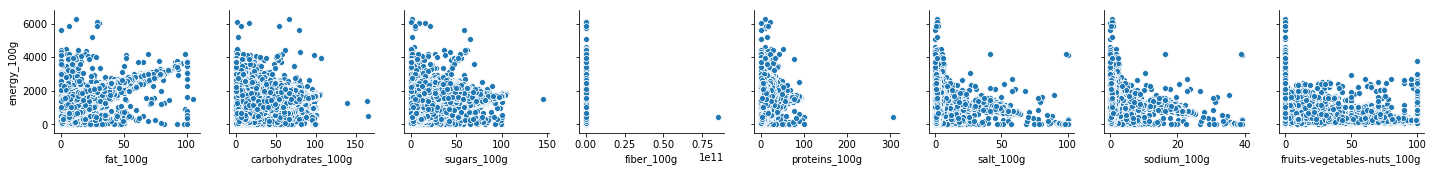

In [60]:
def pairplot_viz(df, y, x):
    sns.pairplot(data=df,
                  y_vars= y,
                  x_vars= x)
    
pairplot_viz(df, 'energy_100g', nutriments)

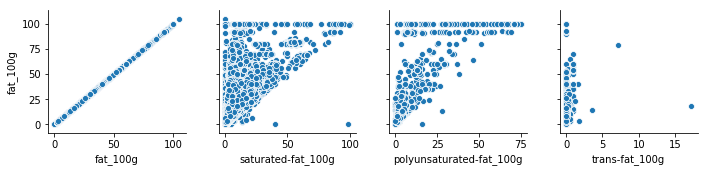

In [61]:
pairplot_viz(df, 'fat_100g', fats)

### 2. Recalculation of energy_100g

In [62]:
df['new_energy_100g'] = df.apply(lambda p: p.fat_100g * 37 + (p.proteins_100g + p.carbohydrates_100g)* 17 if np.isnan(p.energy_100g) else p.energy_100g, axis='columns')

In [63]:
# calculation of gap between old and new energy value
energy_ratio = df['new_energy_100g'].sum() / df['energy_100g'].sum()
energy_ratio

1.0003810133594377

In [64]:
df['energy_100g'] = df['new_energy_100g']
df.drop('new_energy_100g', inplace=True, axis=1)

In [65]:
df = df.dropna(subset=['energy_100g'])

In [66]:
df['nutrition_score'].isna().sum()

3519

In [67]:
df['energy_100g'] = df['energy_100g'].fillna(0)

### 3. Recalculation of nutrition score

In [68]:
fat_score = df['saturated-fat_100g'].apply(lambda p: p // 1 if p <= 10 else 10)
sodium_score = df.sodium_100g.apply(lambda p: p // 335 if p < 90 else 10)
fiber_score = df['fiber_100g'].apply(lambda p: 0 if p <= 0.7 else 1 if p <= 1.4 else 2 if p <= 2.1 else 3 if p <= 2.8 else 4 if p <= 3.5 else 5)
proteins_score = df['proteins_100g'].apply(lambda p: 0 if p <= 1.6 else 1 if p <= 3.2 else 2 if p <= 4.8 else 3 if p <= 6.4 else 4 if p <= 8 else 5)

if 'Beverages' in df['pnns_groups_1']:
    sugars_score = df['sugars_100g'].apply(lambda p: 0 if p <= 4.5 else 1 if p <= 9 else 2 if p <= 13.5 else 3 if p <= 18 else 4 if p <= 22.5 else 5 if p <= 27 else 6 if p <= 31 else 7 if p <= 36 else 8 if p <= 40 else 9 if p <= 45 else 10)
    energy_score = df.energy_100g.apply(lambda p: p // 30 if p < 270 else 10)
    fruit_vegetable_score = df['fruits-vegetables-nuts_100g'].apply(lambda p: 0 if p <= 40 else 2 if p <= 60 else 4 if p <= 80 else 10)
else :
    sugars_score = df['sugars_100g'].apply(lambda p: 0 if p == 0 else 1 if p <= 1.5 else 2 if p <= 3 else 3 if p <= 4.5 else 4 if p <= 6 else 5 if p <= 7.5 else 6 if p <= 9 else 7 if p <= 10.5 else 8 if p <= 12 else 9 if p <= 13.5 else 10)
    energy_score = df.energy_100g.apply(lambda p: p // 335 if p < 3350 else 10)
    fruit_vegetable_score = df['fruits-vegetables-nuts_100g'].apply(lambda p: 0 if p <= 40 else 1 if p <= 60 else 2 if p <= 80 else 5)

df['new_nutrition_score'] = (energy_score + sodium_score + fat_score + sugars_score) - (fiber_score + proteins_score + fruit_vegetable_score)

In [69]:
# calculation of gap between old and new nutrition score
energy_ratio = df['nutrition_score'].sum() / df['new_nutrition_score'].sum()
energy_ratio

1.5789216544300804

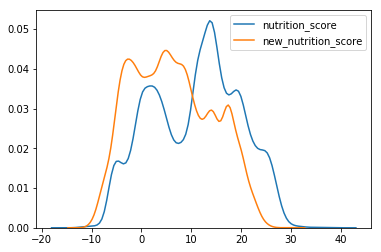

In [77]:
sns.kdeplot(data = df['nutrition_score'])
sns.kdeplot(data = df['new_nutrition_score'])

In [70]:
# assign the new nutrition_score value when the normal value is NaN
df['nutrition_score'] = df['nutrition_score'].fillna(df['new_nutrition_score']) 

### 4. Drop outliers

In [71]:
df['nutriment_sum'] = df['fat_100g'] + df['carbohydrates_100g'] + df['fiber_100g'] + df['proteins_100g'] + df['salt_100g']

if 'Beverages' not in df['pnns_groups_1']:
    df = df.drop(df[(df.nutriment_sum > 100) | (df.nutriment_sum < 70)].index)
    df = df.drop(df[(df.sugars_100g > 100) | (df.sugars_100g < 0)].index)
    df = df.drop(df[(df.fat_100g > 100) | (df.fat_100g < 0)].index)
    df = df.drop(df[(df.proteins_100g > 100) | (df.proteins_100g < 0)].index)
    df = df.drop(df[(df.salt_100g > 100) | (df.salt_100g < 0)].index)
    df = df.drop(df[(df.fiber_100g > 100) | (df.fiber_100g < 0)].index)
    df = df.drop(df[(df.energy_100g > 4000) | (df.energy_100g < 0)].index)

(66372, 29)

In [72]:
# recalculation of nutrition_grade
def new_score(x):
        if x < 0 :
            return 'a'
        elif x < 3 :
            return 'b'
        elif x < 11 :
            return 'c'
        elif x < 19 :
            return 'd'
        else:
            return 'e'

df['nutrition_grade'] = df['nutrition_score'].apply(new_score)

In [73]:
df.groupby(['nutrition_score','nutrition_grade']).size().sort_index()

nutrition_score  nutrition_grade
-15.0            a                     1
-13.0            a                     1
-12.0            a                    16
-11.0            a                    23
-10.0            a                    26
-9.0             a                    30
-8.0             a                    41
-7.0             a                   152
-6.0             a                  1234
-5.0             a                  1253
-4.0             a                  1043
-3.0             a                   919
-2.0             a                  1208
-1.0             a                  1782
 0.0             b                  2644
 1.0             b                  2190
 2.0             b                  2494
 3.0             c                  2368
 4.0             c                  2205
 5.0             c                  1862
 6.0             c                  1403
 7.0             c                  1322
 8.0             c                  1444
 9.0             c      